In [5]:
from QM_System import *
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')
%matplotlib inline

The purpose of this package is to quickly solve quantum systems. These basically come down to solving the following differential equation

\begin{equation}
\left(-\frac{1}{2}\frac{d^2}{dx^2} + V(x) \right)\psi = E \psi
\end{equation}

Or sometimes just $H \psi = E \psi$. Now solving the Schrodinger equation is just an eigenproblem, so we can use tools from scipy to deal with it. In this package you give the class a Quantum system with some potential function $V$ under the boundary conditions that $\psi(0) = \psi(1) = 0$, and it then can tell you as many of the eigenvalues and eigenvectors as you want (by default it shows 10). Lets see this in action. First, an infinite square well where

\begin{equation}
V(x) = 0
\end{equation}

The expected results (https://en.wikipedia.org/wiki/Particle_in_a_box) are that $\psi_n(x) \propto \sin((n+1) \pi x)$ with energies  $E(n) \propto n^2$
Is this true?


Text(0.5, 1.0, 'Eigenvalues of the infinite square well')

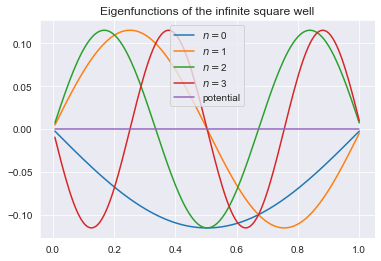

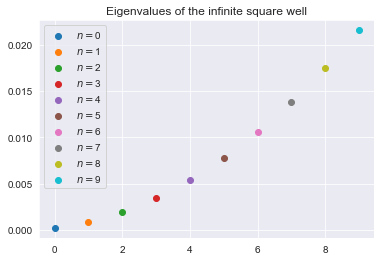

In [33]:
# define the potential and initialize the quantum system

def V(x):
    return 0*x

Q = QM_System(V, k = 10)

# exctract the x axis and eigenpairs of the system
 
x = Q.x_ax

def ψ(n):
    return Q.ψ(n)

def E(n):
    return Q.E(n)

# plot some examples

fig = plt.figure()

for n in range(4):
    plt.plot(x, ψ(n), label = "$n = $" + str(n))
plt.plot(x, V(x), label = 'potential')
plt.legend()
plt.title("Eigenfunctions of the infinite square well")


fig = plt.figure()

for n in range(Q.k):
    plt.scatter(n, E(n), label = "$n = $" + str(n))
plt.legend()
plt.title("Eigenvalues of the infinite square well")

Clearly our solver does actually work with the infinite square well. What about a simple harmonic oscillator ventered at 0.5.

\begin{equation}
V(x) = (x - 0.5)^2
\end{equation}


Here the eigenfunctions should be $\psi_n(x) \propto H_{n+1}(x)e^{-x^2}$  with $E_n \propto n$ (https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator). Is this what we get?

Text(0.5, 1.0, 'Eigenvalues of the quantum harmonic oscillator')

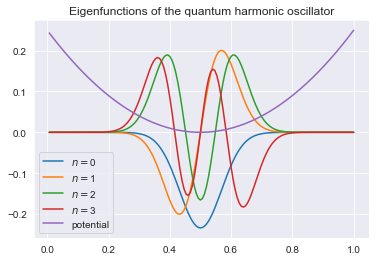

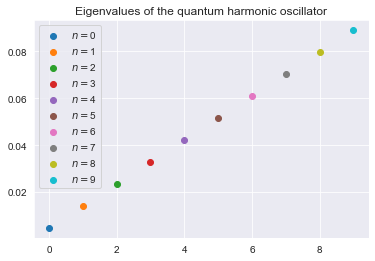

In [32]:
# define the potential and initialize the quantum system

def V(x):
    return (x-0.5)**2

Q = QM_System(V, k = 10)

# exctract the x axis and eigenpairs of the system
 
x = Q.x_ax

def ψ(n):
    return Q.ψ(n)

def E(n):
    return Q.E(n)

# plot some examples

fig = plt.figure()

for n in range(4):
    plt.plot(x, ψ(n), label = "$n = $" + str(n))
plt.plot(x, V(x), label = 'potential')
plt.legend()
plt.title("Eigenfunctions of the quantum harmonic oscillator")


fig = plt.figure()

for n in range(Q.k):
    plt.scatter(n, E(n), label = "$n = $" + str(n))
plt.legend()
plt.title("Eigenvalues of the quantum harmonic oscillator")

These are also correct! (we can check this functions visually against what we know they should be from the wikipedia page). 

In short this package is a quick way of double checking calculations in a first year quantum class.